In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt
import pandas_datareader as pdr

STOCK_NAME = "TTM"

In [2]:
yahoo_data_final = pdr.data.get_data_yahoo(STOCK_NAME, start='2021-01-01')
yahoo_data_final.to_csv("df.csv")
del yahoo_data_final
df = pd.read_csv("df.csv")

In [3]:
df.Open = df.Open.fillna(df.Open.median())
df.High = df.High.fillna(df.High.median())
df.Low = df.Low.fillna(df.Low.median())
df.Close = df.Close.fillna(df.Close.median())

In [4]:
regression = LinearRegression()
regression.fit(df[["Open", "High", "Low"]], df.Close)

LinearRegression()

In [5]:
PRE_CLOSE = []
for i in range(len(df["Close"])):
    temp = (df["Date"][i], (regression.predict([[df["Open"][i], df["High"][i], df["Low"][i]]])))
    PRE_CLOSE.append(temp)
    
perdicted = pd.DataFrame(PRE_CLOSE, columns=["Date", "Close"])
del PRE_CLOSE
del temp

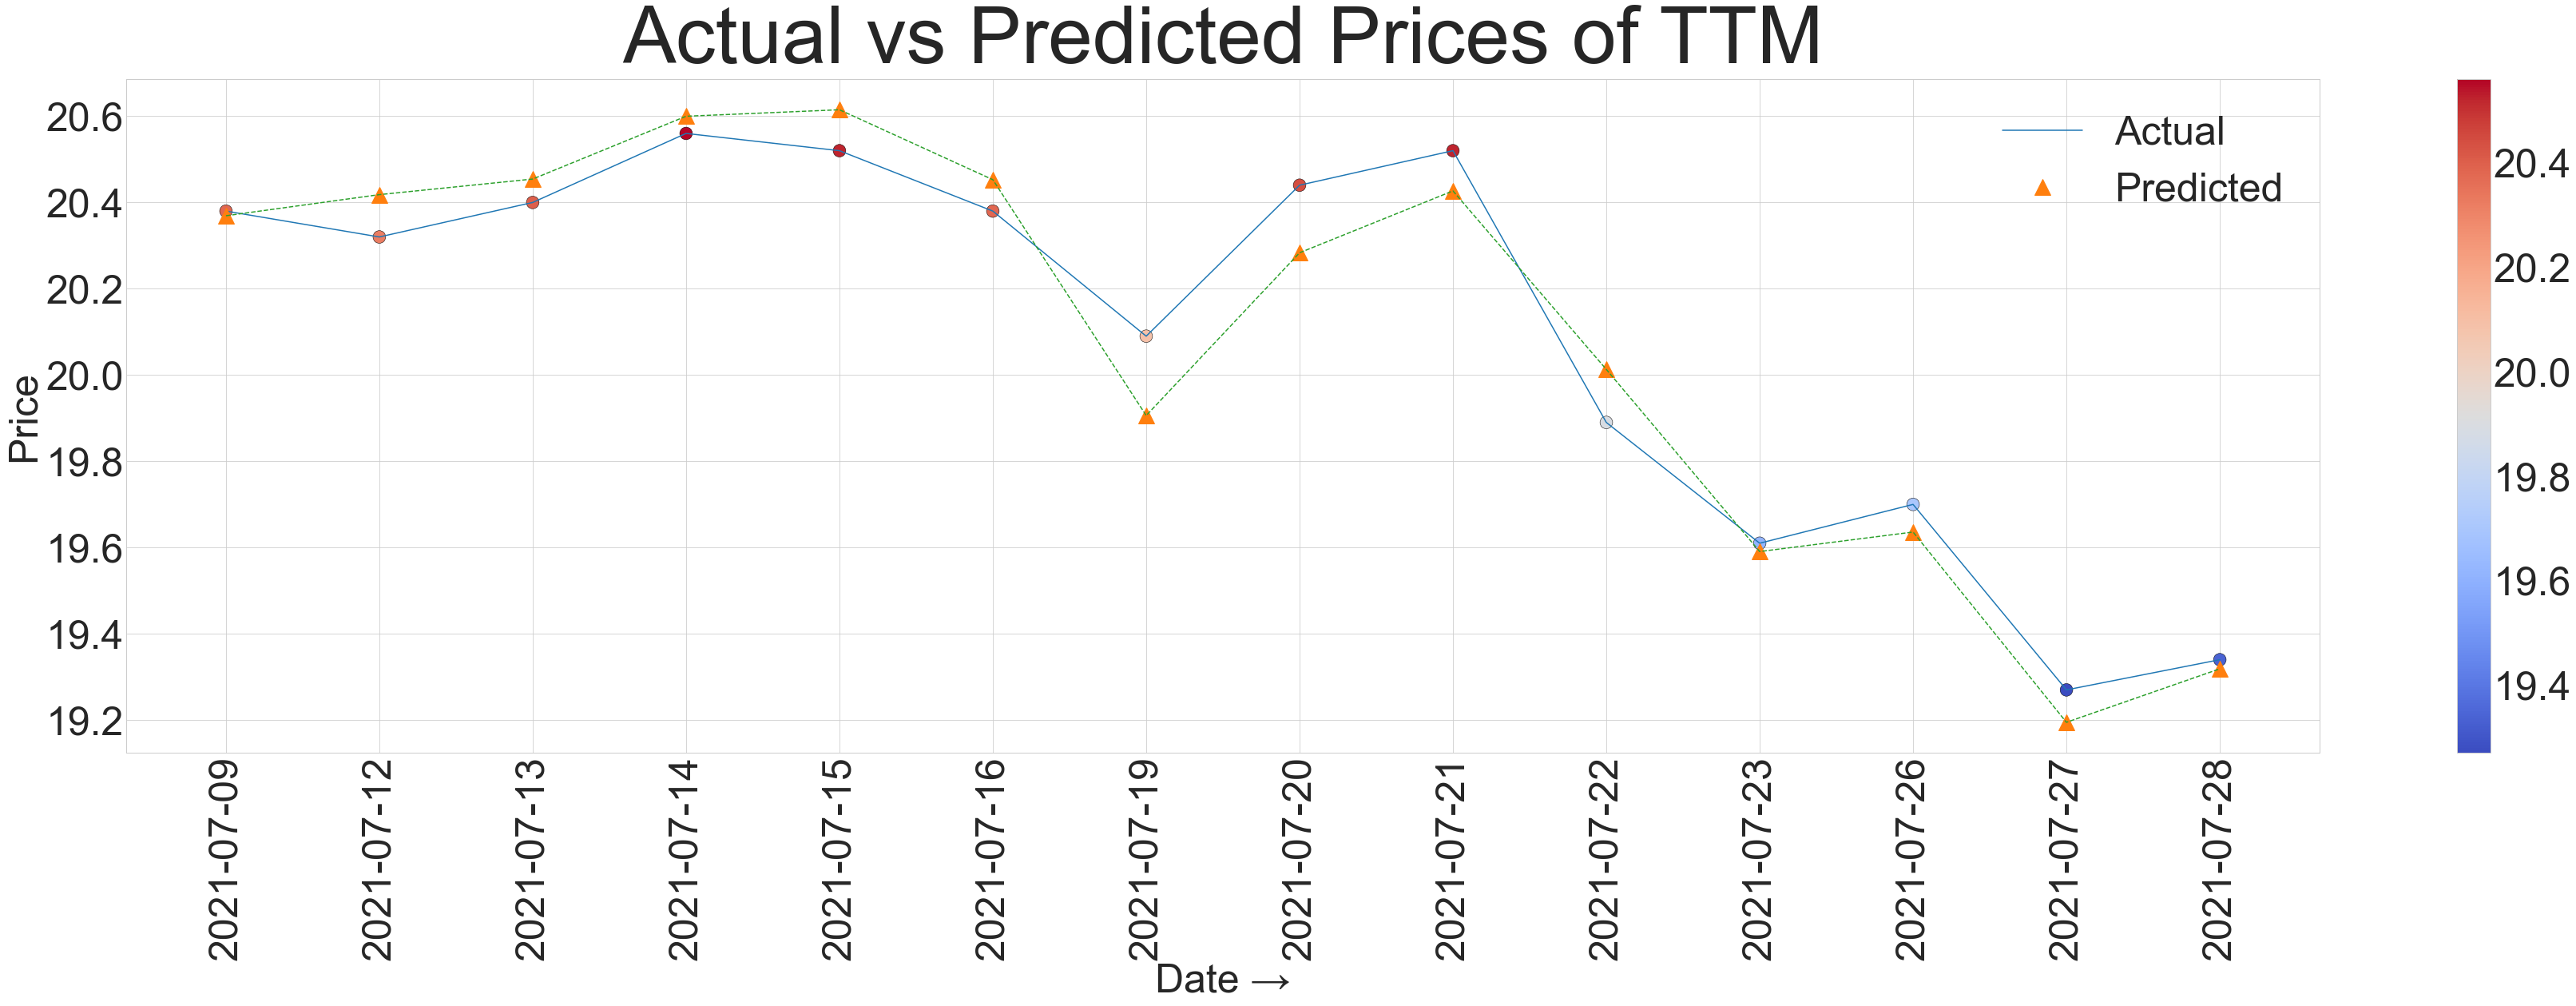

In [7]:
# # name = ["TATAMOTORS.NS"]
plt.style.use("seaborn-whitegrid")
fig = plt.gcf()
fig.set_size_inches(50, 15)
# data = pdr.get_data_yahoo(name, start="2020-06-17")['Close']
plt.title(f"Actual vs Predicted Prices of {STOCK_NAME}", fontsize=100)
plt.xlabel("Date →", fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.xticks(rotation=90)
plt.ylabel("Price", fontsize=50)
plt.tight_layout()
cmap = "coolwarm"
last = int(-14)
plt.scatter(df["Date"][last:], df["Close"][last:], marker=".", c=df["Close"][last:], 
            cmap=cmap, edgecolor="black", linewidth=0.5, s=1000)

plt.plot(df["Date"][last:], df["Close"][last:], '-', markersize=2000)

plt.plot(perdicted["Date"][last:], perdicted["Close"][last:], '^', markersize=20)
plt.plot(perdicted["Date"][last:], perdicted["Close"][last:], "--", markersize=30)


plt.legend(["Actual", "Predicted"], loc=1, prop={'size': 50})

plt.colorbar().ax.tick_params(labelsize=50)
plt.savefig("graph.png", dpi=250, bbox_inches="tight");

In [9]:
del perdicted
del df